## Goal : can we automate the process of determining the cuisine of a given recipe?

#### pandas provides two key data structures:
#### (a) DataFrame: A 2-dimensional, table-like data structure (like a spreadsheet or SQL table).
#### (b) Series: A 1-dimensional labeled array.

In [1]:
import pandas as pd 
import numpy as np 
import re

# Let's changes a display setting in pandas so that 
# all columns and rows in a DataFrame will be shown when you print it out.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Download the data from the IBM server and read it into a pandas dataframe.

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

In [4]:
df.to_csv('cuisine.csv', index=False)

#### Get the Basic Structure of the dataset

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Columns: 384 entries, country to zucchini
dtypes: object(384)
memory usage: 169.0+ MB


(57691, 384)

In [6]:
df.dtypes.value_counts()

object    384
Name: count, dtype: int64

#### View the first and last few rows with

In [7]:
df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [8]:
df.tail()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
57686,Japan,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No

### The method "DataFrame.describe()" in pandas is used to generate descriptive statistics of a DataFrame.

#### For numeric columns, it returns stats like:

count, mean, std, min, 25%, 50%, 75%, max

#### For non-numeric (object or category) columns, it returns:

count: number of non-null entries

unique: number of unique values

top: most frequent value

freq: frequency of the top value

#### Get statistical summaries

In [9]:
df.describe()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,57691,5

##### If you want summary only for numeric columns, you can filter them
##### You will get error message if DataFrame has no numeric columns.

In [10]:
df.select_dtypes(include='number').describe()

ValueError: Cannot describe a DataFrame without columns

#### Check for missing values

In [11]:
df.isnull().sum()

country                    0
almond                     0
angelica                   0
anise                      0
anise_seed                 0
apple                      0
apple_brandy               0
apricot                    0
armagnac                   0
artemisia                  0
artichoke                  0
asparagus                  0
avocado                    0
bacon                      0
baked_potato               0
balm                       0
banana                     0
barley                     0
bartlett_pear              0
basil                      0
bay                        0
bean                       0
beech                      0
beef                       0
beef_broth                 0
beef_liver                 0
beer                       0
beet                       0
bell_pepper                0
bergamot                   0
berry                      0
bitter_orange              0
black_bean                 0
black_currant              0
black_mustard_

##### If you're only interested in columns that do have missing values

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [13]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing,
    'Percent Missing': missing_percent
})
display(missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False).head(10))

,Missing Values,Percent Missing


#### Examine unique values

In [14]:
df.nunique()

country                    69
almond                      2
angelica                    2
anise                       2
anise_seed                  2
apple                       2
apple_brandy                2
apricot                     2
armagnac                    2
artemisia                   2
artichoke                   2
asparagus                   2
avocado                     2
bacon                       2
baked_potato                2
balm                        2
banana                      2
barley                      2
bartlett_pear               2
basil                       2
bay                         2
bean                        2
beech                       2
beef                        2
beef_broth                  2
beef_liver                  2
beer                        2
beet                        2
bell_pepper                 2
bergamot                    2
berry                       2
bitter_orange               2
black_bean                  2
black_curr

In [15]:
nunique = df.nunique().sort_values(ascending=False)
print("Columns with most unique values (potential IDs or free text):")
display(nunique.head(10))
print("\nColumns with fewest unique values (likely categorical):")
display(nunique.tail(10))

Columns with most unique values (potential IDs or free text):


country           69
almond             2
popcorn            2
plum               2
pistachio          2
pineapple          2
pimento            2
pimenta            2
peppermint_oil     2
peppermint         2
dtype: int64


Columns with fewest unique values (likely categorical):


fish               2
fig                2
feta_cheese        2
fenugreek          2
fennel             2
enokidake          2
endive             2
emmental_cheese    2
elderberry         2
zucchini           2
dtype: int64

#### Check if any columns appear to contain numeric data stored as strings
##### The goal of this script is to identify columns in a DataFrame that look like numeric data but are stored as strings (i.e., they have dtype == 'object')
##### For example
$$
\begin{array}{|l|l|}
\hline
\textbf{Column} & \textbf{Data} \\
\hline
\text{Age} & \text{`23'} \\
\text{Salary} & \text{`40000'} \\
\text{Code} & \text{`ABC123'} \\
\hline
\end{array}
$$
##### All are stored as type object, but '23' and '40000' could be used as numbers if cleaned.

In [16]:
def is_likely_numeric(series):
    # Sample first 100 non-null values
    sample = series.dropna().head(100)
    if len(sample) == 0:
        return False
    
    # Try to convert to numeric
    try:
        pd.to_numeric(sample)
        return True
    except:
        # If more than 80% can be converted, it's likely numeric
        try:
            success = sum(pd.to_numeric(sample, errors='coerce').notnull()) / len(sample)
            return success > 0.8
        except:
            return False

potentially_numeric = []
for col in df.columns:
    if df[col].dtype == 'object' and is_likely_numeric(df[col]):
        potentially_numeric.append(col)

print(f"Found {len(potentially_numeric)} columns that appear to contain numeric data stored as strings")
if potentially_numeric:
    print("First 10:", potentially_numeric[:10])

Found 0 columns that appear to contain numeric data stored as strings


In [17]:
for col in potentially_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#### Value counts for first categorical-looking column 

In [18]:
display(df[df.columns[0]].value_counts().head())

country
American    40150
Mexico       1754
Italian      1715
Italy        1461
Asian        1176
Name: count, dtype: int64

In [19]:
df[df.columns[0]].value_counts()

country
American                   40150
Mexico                      1754
Italian                     1715
Italy                       1461
Asian                       1176
French                       996
east_asian                   951
Canada                       774
korean                       767
Mexican                      622
western                      450
Southern_SoulFood            346
India                        324
Jewish                       320
Spanish_Portuguese           291
Mediterranean                289
UK-and-Ireland               282
Indian                       274
France                       268
MiddleEastern                248
Central_SouthAmerican        241
Germany                      237
Eastern-Europe               235
Chinese                      226
Greek                        225
English_Scottish             204
Caribbean                    183
Thai                         164
Scandinavia                  158
EasternEuropean_Russian      146
Ca

#### Check for duplicate rows

In [20]:
dupe_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dupe_count} ({dupe_count/len(df):.2%} of data)")

Number of duplicate rows: 4724 (8.19% of data)


#### Group similar column names

In [21]:
prefixes = {}
for col in df.columns:
    parts = col.split('_')
    prefix = parts[0] if len(parts) > 1 else 'other'
    if prefix not in prefixes:
        prefixes[prefix] = []
    prefixes[prefix].append(col)

# Show the most common column prefixes
prefix_counts = {k: len(v) for k, v in prefixes.items()}
top_prefixes = dict(sorted(prefix_counts.items(), key=lambda x: x[1], reverse=True)[:10])
print("Most common column name patterns:")
for prefix, count in top_prefixes.items():
    print(f"- {prefix}_* : {count} columns")

Most common column name patterns:
- other_* : 253 columns
- roasted_* : 9 columns
- black_* : 7 columns
- red_* : 4 columns
- orange_* : 3 columns
- smoked_* : 3 columns
- beef_* : 2 columns
- chicken_* : 2 columns
- corn_* : 2 columns
- grape_* : 2 columns


#### Let's check that some ingredients exist in our dataframe:

In [22]:
keywords = ['rice', 'wasabi', 'soy']

for keyword in keywords:
    matches = [col for col in df.columns if re.search(keyword, col, re.IGNORECASE)]
    print(f"Matches for '{keyword}': {matches}")


Matches for 'rice': ['brown_rice', 'licorice', 'rice']
Matches for 'wasabi': ['wasabi']
Matches for 'soy': ['soy_sauce', 'soybean', 'soybean_oil']


#### 
#### (a) Cuisine column is labeled as Country, which is inaccurate. Let's rename it.
#### (b) Make all the cuisine names lowercase.

In [23]:
df.columns = ['cuisine'] + list(df.columns[1:])
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [24]:
## Other ways
df.rename(columns={df.columns[0]: 'cuisine'}, inplace=True)
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,

In [25]:
df["cuisine"] = df["cuisine"].str.lower()
(df[df.columns[0]].value_counts()).head(10)

cuisine
american      40150
italian        1789
mexico         1768
italy          1461
asian          1193
french          996
east_asian      951
canada          774
korean          767
mexican         622
Name: count, dtype: int64

####
#### Make the cuisine names consistent.

In [26]:
cuisine_map = {
    "austria": "austrian",
    "belgium": "belgian",
    "china": "chinese",
    "canada": "canadian",
    "netherlands": "dutch",
    "france": "french",
    "germany": "german",
    "india": "indian",
    "indonesia": "indonesian",
    "iran": "iranian",
    "italy": "italian",
    "japan": "japanese",
    "israel": "israeli",
    "korea": "korean",
    "lebanon": "lebanese",
    "malaysia": "malaysian",
    "mexico": "mexican",
    "pakistan": "pakistani",
    "philippines": "philippine",
    "scandinavia": "scandinavian",
    "spain": "spanish_portuguese",
    "portugal": "spanish_portuguese",
    "switzerland": "swiss",
    "thailand": "thai",
    "turkey": "turkish",
    "vietnam": "vietnamese",
    "uk-and-ireland": "uk-and-irish",
    "irish": "uk-and-irish"
}

# Apply the mapping
df["cuisine"] = df["cuisine"].replace(cuisine_map)
(df[df.columns[0]].value_counts()).head(10)

cuisine
american      40150
italian        3250
mexican        2390
french         1264
asian          1193
east_asian      951
korean          799
canadian        774
indian          598
western         450
Name: count, dtype: int64

####
#### Remove cuisines with < 50 recipes.

In [27]:
# Count number of recipes per cuisine
cuisine_counts = df['cuisine'].value_counts()

# Keep only cuisines with at least 50 entries
valid_cuisines = cuisine_counts[cuisine_counts >= 50].index

rows_before = len(df)

# Filter DataFrame
df = df[df['cuisine'].isin(valid_cuisines)]

rows_after = len(df)

print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")
print(f"Rows removed: {rows_before - rows_after}")


Rows before: 57691
Rows after: 57394
Rows removed: 297


In [28]:
df[df.columns[0]].value_counts()

cuisine
american                   40150
italian                     3250
mexican                     2390
french                      1264
asian                       1193
east_asian                   951
korean                       799
canadian                     774
indian                       598
western                      450
chinese                      442
spanish_portuguese           416
uk-and-irish                 368
southern_soulfood            346
jewish                       320
japanese                     320
mediterranean                289
thai                         289
german                       289
scandinavian                 250
middleeastern                248
central_southamerican        241
eastern-europe               235
greek                        225
english_scottish             204
caribbean                    183
easterneuropean_russian      146
cajun_creole                 146
moroccan                     137
african                      115
so

####
#### Convert all Yes's to 1's and the No's to 0's

In [29]:
df = df.replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_19024\4133496628.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)


,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

####
#### Get the recipes that contain rice and soy and wasabi and seaweed.

In [30]:
check_recipes = df.loc[
    (df["rice"] == 1) &
    (df["soy_sauce"] == 1) &
    (df["wasabi"] == 1) &
    (df["seaweed"] == 1)
]

check_recipes


,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
11306,japanese,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

####
#### (a) Let's count the ingredients across all recipes.
#### (b) Let's sort this dataframe in descending order.

In [31]:
# Sum each ingredient column (excluding the first column, which is probably a name or ID)
ingredient_counts = df.iloc[:, 1:].sum()

# Create a new DataFrame with ingredient names and their counts
ing_df = pd.DataFrame({
    "ingredient": ingredient_counts.index,
    "count": ingredient_counts.values
})

# Sort by count (highest first) and reset the index
ing_df = ing_df.sort_values("count", ascending=False).reset_index(drop=True)

# Print the result
print(ing_df)

                  ingredient  count
0                        egg  21022
1                      wheat  20775
2                     butter  20715
3                      onion  18078
4                     garlic  17351
5                       milk  12869
6              vegetable_oil  11103
7                      cream  10170
8                     tomato   9920
9                  olive_oil   9874
10              black_pepper   9825
11                    pepper   9230
12                   vanilla   9009
13                   cayenne   8253
14                   vinegar   8060
15             cane_molasses   7741
16               bell_pepper   5979
17                  cinnamon   5593
18                   parsley   5550
19                   chicken   5436
20               lemon_juice   5065
21                      beef   4902
22                      corn   4828
23                     cocoa   4798
24                  scallion   4782
25                     bread   4571
26                    ginger

####
####  let's try to find out what ingredients Chinese people typically use, and what is Canadian food for example.

In [32]:
cuisines = df.groupby("cuisine").mean()
cuisines.head(10)

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
african,0.156522,0.000000,

#### Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.

In [33]:
num_ingredients = 5  # number of top ingredients to show

def print_top_ingredients(row):
    print(row.name.upper())  # print cuisine name in uppercase
    top = row.sort_values(ascending=False).head(num_ingredients) * 100  # top ingredients in %
    
    for ingredient, percent in top.items():
        print(f"{ingredient} ({int(percent)}%)", end=' ')
    print("\n")

# apply the function to each cuisine row
cuisines.apply(print_top_ingredients, axis=1);


AFRICAN
onion (53%) olive_oil (52%) garlic (49%) cumin (42%) cayenne (35%) 

AMERICAN
butter (41%) egg (40%) wheat (39%) onion (29%) milk (26%) 

ASIAN
soy_sauce (49%) ginger (48%) garlic (47%) rice (41%) scallion (38%) 

CAJUN_CREOLE
onion (69%) cayenne (56%) garlic (48%) butter (36%) vegetable_oil (34%) 

CANADIAN
wheat (39%) butter (38%) egg (35%) onion (34%) garlic (27%) 

CARIBBEAN
onion (51%) garlic (50%) vegetable_oil (31%) black_pepper (31%) tomato (30%) 

CENTRAL_SOUTHAMERICAN
garlic (56%) onion (54%) cayenne (51%) tomato (41%) corn (32%) 

CHINESE
soy_sauce (68%) ginger (53%) garlic (52%) scallion (48%) sesame_oil (39%) 

EAST_ASIAN
garlic (55%) soy_sauce (50%) scallion (49%) cayenne (47%) sesame_oil (39%) 

EASTERN-EUROPE
wheat (53%) egg (52%) butter (48%) onion (45%) milk (27%) 

EASTERNEUROPEAN_RUSSIAN
butter (60%) egg (50%) wheat (49%) onion (38%) cream (33%) 

ENGLISH_SCOTTISH
butter (67%) wheat (62%) egg (53%) cream (41%) milk (35%) 

FRENCH
butter (50%) egg (44%) wheat

## Some Other things can be done : Dont run it

In [34]:
# Convert object columns that should be numeric
for col in potentially_numeric:  # From your earlier analysis
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values
# For columns with high missing percentages:
df = df.dropna(thresh=len(df)*0.5, axis=1)  # Drop columns with >50% missing

# For remaining missing values, choose appropriate strategy:
# - Numeric columns: mean, median, or 0
# - Categorical: mode or 'Unknown'
df = df.fillna(df.mean(numeric_only=True))  # For numeric columns
df = df.fillna('Unknown')  # For object columns

# Convert low-cardinality columns to categorical type
for col in df.select_dtypes(['object']).columns:
    if df[col].nunique() < 50:  # Adjust threshold as needed
        df[col] = df[col].astype('category')


# Identify correlated numeric features
numeric_df = df.select_dtypes(include=['number'])
if not numeric_df.empty:
    corr = numeric_df.corr()
    
    # Identify highly correlated pairs (>0.9)
    high_corr = np.where(np.abs(corr) > 0.9)
    high_corr_pairs = [(corr.columns[x], corr.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]
    
    # Print and possibly drop one from each pair
    print("Highly correlated features:")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {corr.loc[pair[0], pair[1]]:.2f}")


Highly correlated features:
geranium and pelargonium: 1.00


### Random Forest

In [37]:
df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,asparagus,avocado,bacon,baked_potato,balm,banana,barley,bartlett_pear,basil,bay,bean,beech,beef,beef_broth,beef_liver,beer,beet,bell_pepper,bergamot,berry,bitter_orange,black_bean,black_currant,black_mustard_seed_oil,black_pepper,black_raspberry,black_sesame_seed,black_tea,blackberry,blackberry_brandy,blue_cheese,blueberry,bone_oil,bourbon_whiskey,brandy,brassica,bread,broccoli,brown_rice,brussels_sprout,buckwheat,butter,buttermilk,cabbage,cabernet_sauvignon_wine,cacao,camembert_cheese,cane_molasses,caraway,cardamom,carnation,carob,carrot,cashew,cassava,catfish,cauliflower,caviar,cayenne,celery,celery_oil,cereal,chamomile,champagne_wine,chayote,cheddar_cheese,cheese,cherry,cherry_brandy,chervil,chicken,chicken_broth,chicken_liver,chickpea,chicory,chinese_cabbage,chive,cider,cilantro,cinnamon,citrus,citrus_peel,clam,clove,cocoa,coconut,coconut_oil,cod,coffee,cognac,concord_grape,condiment,coriander,corn,corn_flake,corn_grit,cottage_cheese,crab,cranberry,cream,cream_cheese,cucumber,cumin,cured_pork,currant,date,dill,durian,eel,egg,egg_noodle,elderberry,emmental_cheese,endive,enokidake,fennel,fenugreek,feta_cheese,fig,fish,flower,frankfurter,fruit,galanga,gardenia,garlic,gelatin,geranium,gin,ginger,goat_cheese,grape,grape_brandy,grape_juice,grapefruit,green_bell_pepper,green_tea,gruyere_cheese,guava,haddock,ham,hazelnut,herring,holy_basil,honey,hop,horseradish,huckleberry,jamaican_rum,japanese_plum,jasmine,jasmine_tea,juniper_berry,kaffir_lime,kale,katsuobushi,kelp,kidney_bean,kiwi,kohlrabi,kumquat,lamb,lard,laurel,lavender,leaf,leek,lemon,lemon_juice,lemon_peel,lemongrass,lentil,lettuce,licorice,lilac_flower_oil,lima_bean,lime,lime_juice,lime_peel_oil,lingonberry,litchi,liver,lobster,long_pepper,lovage,macadamia_nut,macaroni,mace,mackerel,malt,mandarin,mandarin_peel,mango,maple_syrup,marjoram,mate,matsutake,meat,melon,milk,milk_fat,mint,mozzarella_cheese,mung_bean,munster_cheese,muscat_grape,mushroom,mussel,mustard,mutton,nectarine,nira,nut,nutmeg,oat,oatmeal,octopus,okra,olive,olive_oil,onion,orange,orange_flower,orange_juice,orange_peel,oregano,ouzo,oyster,palm,papaya,parmesan_cheese,parsley,parsnip,passion_fruit,pea,peach,peanut,peanut_butter,peanut_oil,pear,pear_brandy,pecan,pelargonium,pepper,peppermint,peppermint_oil,pimenta,pimento,pineapple,pistachio,plum,popcorn,porcini,pork,pork_liver,pork_sausage,port_wine,potato,potato_chip,prawn,prickly_pear,provolone_cheese,pumpkin,quince,radish,raisin,rapeseed,raspberry,raw_beef,red_algae,red_bean,red_kidney_bean,red_wine,rhubarb,rice,roasted_almond,roasted_beef,roasted_hazelnut,roasted_meat,roasted_nut,roasted_peanut,roasted_pecan,roasted_pork,roasted_sesame_seed,romano_cheese,root,roquefort_cheese,rose,rosemary,rum,rutabaga,rye_bread,rye_flour,saffron,sage,sake,salmon,salmon_roe,sassafras,sauerkraut,savory,scallion,scallop,sea_algae,seaweed,seed,sesame_oil,sesame_seed,shallot,sheep_cheese,shellfish,sherry,shiitake,shrimp,smoke,smoked_fish,smoked_salmon,smoked_sausage,sour_cherry,sour_milk,soy_sauce,soybean,soybean_oil,spearmint,squash,squid,star_anise,starch,strawberry,strawberry_jam,strawberry_juice,sturgeon_caviar,sumac,sunflower_oil,sweet_potato,swiss_cheese,tabasco_pepper,tamarind,tangerine,tarragon,tea,tequila,thai_pepper,thyme,tomato,tomato_juice,truffle,tuna,turkey,turmeric,turnip,vanilla,veal,vegetable,vegetable_oil,vinegar,violet,walnut,wasabi,watercress,watermelon,wheat,wheat_bread,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,vietnamese,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [38]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Data Preparation

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
selected_df = df[df["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])]
# Extract features (X) and target (y)
X = selected_df.drop('cuisine', axis=1)  # Features (ingredients)
y = selected_df['cuisine'].astype(str)    # Target (cuisine types)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1958, 383)
Testing set shape: (490, 383)


#### Step 3: Basic Random Forest Model

In [41]:
# Create a Random Forest with max_depth specified
rf_basic = RandomForestClassifier(max_depth=None, random_state=42)  # Change 10 to any depth you prefer

# Train the model
rf_basic.fit(X_train, y_train)

# Make predictions
y_pred_basic = rf_basic.predict(X_test)

# Evaluate the model
print("Random Forest with max_depth=10:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_basic):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_basic))

Random Forest with max_depth=10:
Accuracy: 0.7857

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        88
           1       0.85      0.96      0.90       120
           2       0.83      0.59      0.69        64
           3       0.79      0.89      0.84       160
           4       0.74      0.60      0.67        58

    accuracy                           0.79       490
   macro avg       0.78      0.73      0.75       490
weighted avg       0.78      0.79      0.78       490



#### Step 4: Feature Importance Analysis

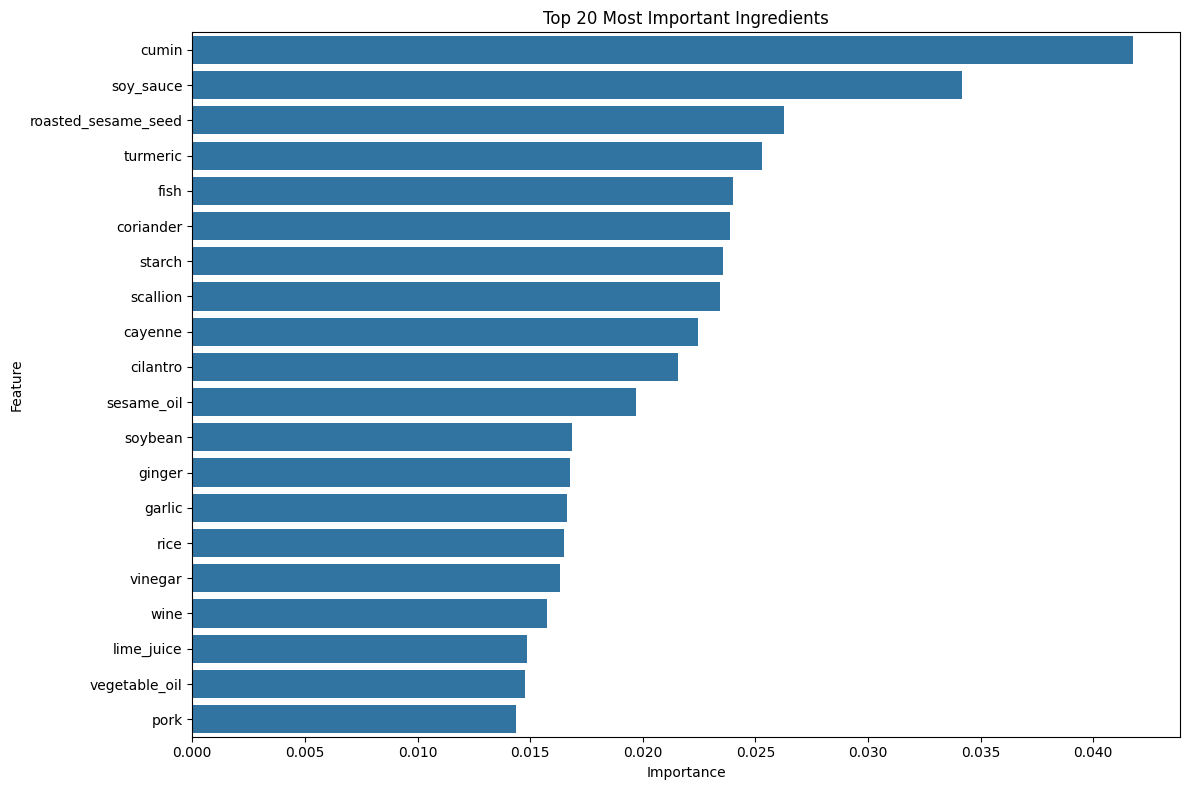

Top 10 most important ingredients:
                 Feature  Importance
112                cumin    0.041766
330            soy_sauce    0.034161
293  roasted_sesame_seed    0.026274
359             turmeric    0.025314
129                 fish    0.023992
102            coriander    0.023890
337               starch    0.023542
311             scallion    0.023430
68               cayenne    0.022470
88              cilantro    0.021555


In [42]:
# Get feature importance
feature_importances = rf_basic.feature_importances_

# Create a DataFrame to visualize feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20 most important ingredients
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(20))
plt.title('Top 20 Most Important Ingredients')
plt.tight_layout()
plt.show()

# Print top 10 ingredients
print("Top 10 most important ingredients:")
print(features_df.head(10))

#### Step 5: Cross-Validation

In [43]:
# Perform cross-validation
cv_scores = cross_val_score(rf_basic, X, y_encoded, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Cross-validation scores: [0.82040816 0.8        0.7877551  0.72801636 0.78118609]
Mean CV accuracy: 0.7835
Standard deviation: 0.0308


#### Step 6: Hyperparameter Tuning

In [44]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# For a quicker tutorial run, use a smaller grid
# Uncomment this for faster execution
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 20],
#     'min_samples_split': [2, 5]
# }

# Create a grid search object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Create the optimized model with best parameters
rf_optimized = grid_search.best_estimator_

# Make predictions with the optimized model
y_pred_optimized = rf_optimized.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimized))

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.8156

Optimized Random Forest Performance:
Accuracy: 0.7939

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66        88
           1       0.89      0.97      0.92       120
           2       0.84      0.58      0.69        64
           3       0.79      0.88      0.83       160
           4       0.76      0.66      0.70        58

    accuracy                           0.79       490
   macro avg       0.79      0.75      0.76       490
weighted avg       0.79      0.79      0.79       490



#### Step 7: Confusion Matrix Visualization

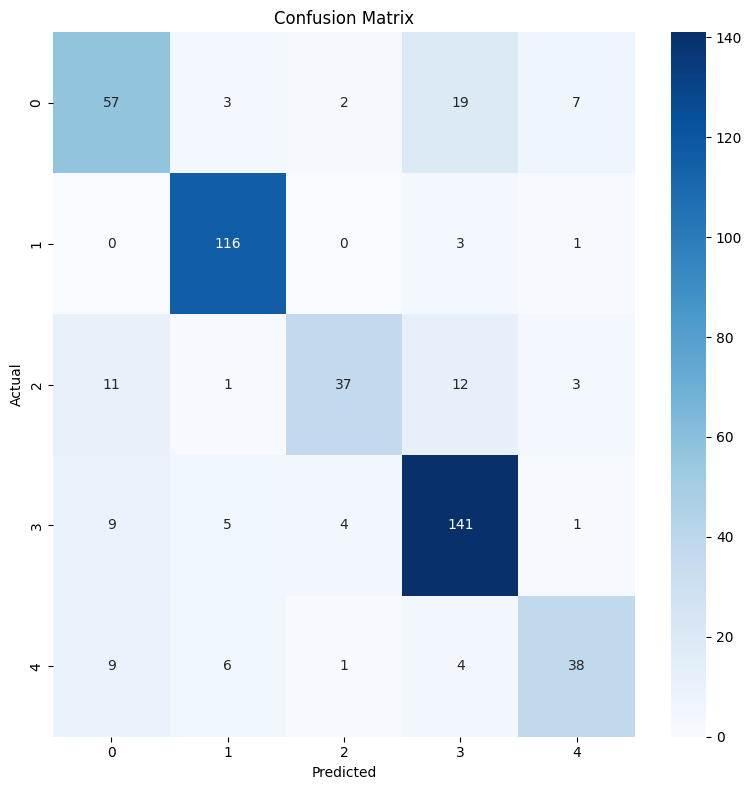

In [45]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_optimized)

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

#### Step 8: Learning Curves Analysis

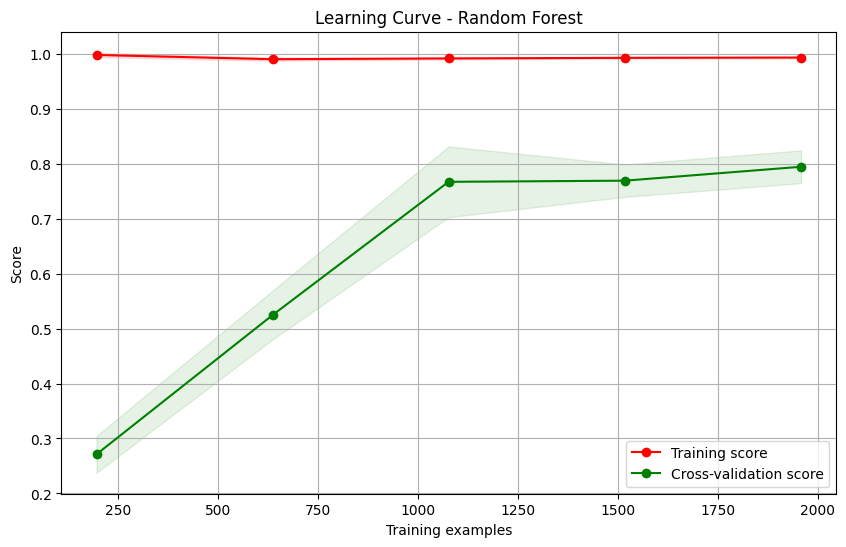

In [46]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

# Plot learning curve
plot_learning_curve(rf_optimized, "Learning Curve - Random Forest", X, y_encoded, cv=5)
plt.show()

#### Step 9: Feature Selection

In [47]:
# Use SelectFromModel for feature selection
selector = SelectFromModel(rf_optimized, threshold='median')
selector = selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]
print(f"Number of features selected: {len(selected_features)} out of {X_train.shape[1]}")
print("Selected features:")
print(selected_features.tolist())

# Train a model with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

rf_selected = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf_selected.fit(X_train_selected, y_train)
y_pred_selected = rf_selected.predict(X_test_selected)

print("\nRandom Forest with Selected Features Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_selected):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_selected))

Number of features selected: 192 out of 383
Selected features:
['almond', 'anise_seed', 'apple', 'apricot', 'asparagus', 'avocado', 'bacon', 'banana', 'barley', 'basil', 'bay', 'bean', 'beef', 'beef_broth', 'beer', 'bell_pepper', 'black_bean', 'black_mustard_seed_oil', 'black_pepper', 'black_sesame_seed', 'black_tea', 'brassica', 'bread', 'broccoli', 'brown_rice', 'buckwheat', 'butter', 'buttermilk', 'cabbage', 'cane_molasses', 'cardamom', 'carrot', 'cashew', 'cauliflower', 'cayenne', 'celery', 'celery_oil', 'cheese', 'chicken', 'chicken_broth', 'chickpea', 'chicory', 'chinese_cabbage', 'chive', 'cider', 'cilantro', 'cinnamon', 'citrus', 'clam', 'cocoa', 'coconut', 'cod', 'coffee', 'cognac', 'coriander', 'corn', 'crab', 'cream', 'cream_cheese', 'cucumber', 'cumin', 'date', 'eel', 'egg', 'egg_noodle', 'enokidake', 'fennel', 'fenugreek', 'fish', 'fruit', 'galanga', 'garlic', 'gelatin', 'ginger', 'grape_juice', 'green_bell_pepper', 'green_tea', 'ham', 'honey', 'horseradish', 'japanese_plu

#### Step 10: Class-wise Performance Analysis

<Figure size 1400x800 with 0 Axes>

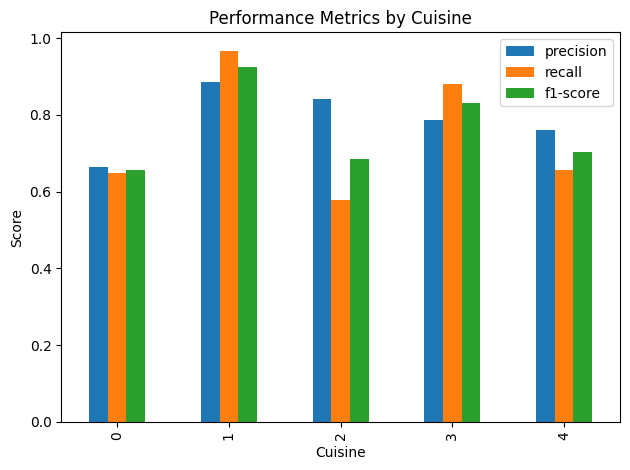

Cuisines ordered by F1-score (worst to best):
   precision    recall  f1-score
0   0.662791  0.647727  0.655172
2   0.840909  0.578125  0.685185
4   0.760000  0.655172  0.703704
3   0.787709  0.881250  0.831858
1   0.885496  0.966667  0.924303


In [48]:
# Get classification report as a dict
report = classification_report(y_test, y_pred_optimized, 
                              output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score for each cuisine
plt.figure(figsize=(14, 8))
report_df.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar')
plt.title('Performance Metrics by Cuisine')
plt.ylabel('Score')
plt.xlabel('Cuisine')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Identify which cuisines are most challenging to predict
print("Cuisines ordered by F1-score (worst to best):")
cuisine_f1 = report_df.iloc[:-3].sort_values(by='f1-score')
print(cuisine_f1[['precision', 'recall', 'f1-score']])

#### Step 11: Predictions Probability Analysis

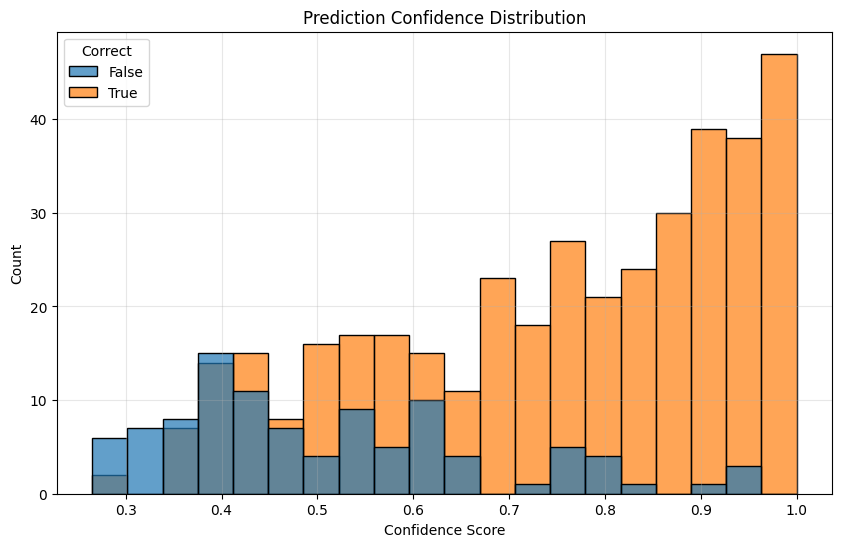

Average confidence for correct predictions: 0.7502358611825194
Average confidence for incorrect predictions: 0.5095099009900989


In [49]:
# Get probabilities for the test set
y_probs = rf_optimized.predict_proba(X_test)

# Get the maximum probability for each prediction
max_probs = np.max(y_probs, axis=1)

# Create a dataframe for analysis
probs_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_optimized,
    'Confidence': max_probs
})

# Add a column to flag correct predictions
probs_df['Correct'] = probs_df['Actual'] == probs_df['Predicted']

# Visualize confidence distribution for correct vs incorrect predictions
plt.figure(figsize=(10, 6))
sns.histplot(data=probs_df, x='Confidence', hue='Correct', bins=20, alpha=0.7)
plt.title('Prediction Confidence Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Find average confidence for correct and incorrect predictions
print("Average confidence for correct predictions:", 
      probs_df[probs_df['Correct']]['Confidence'].mean())
print("Average confidence for incorrect predictions:", 
      probs_df[~probs_df['Correct']]['Confidence'].mean())


#### Step 12: Model Deployment

In [50]:
# Save the model and feature selector (no encoder)
joblib.dump(rf_optimized, 'cuisine_random_forest_model.pkl')
joblib.dump(selector, 'cuisine_feature_selector.pkl')

# Function to make predictions with the deployed model
def predict_cuisine(ingredients_data):
    """
    ingredients_data: DataFrame or dict with ingredient columns, 
                     where values are 0 or 1
    """
    # Load the saved model
    model = joblib.load('cuisine_random_forest_model.pkl')
    
    # Convert to DataFrame if it's a dict
    if isinstance(ingredients_data, dict):
        ingredients_data = pd.DataFrame([ingredients_data])
    
    # Make prediction
    prediction = model.predict(ingredients_data)[0]
    
    # Get confidence scores
    probabilities = model.predict_proba(ingredients_data)[0]
    confidence = np.max(probabilities)

    # Map probabilities to actual class labels
    all_probabilities = {
        cuisine: prob for cuisine, prob in 
        zip(model.classes_, probabilities)
    }
    
    return {
        'predicted_cuisine': prediction,
        'confidence': confidence,
        'all_probabilities': all_probabilities
    }

# Example usage
test_ingredients = X_test.iloc[0].to_dict()  # Get first test sample
print("Prediction for test sample:")
print(predict_cuisine(test_ingredients))


Prediction for test sample:
{'predicted_cuisine': 0, 'confidence': 0.6254166666666666, 'all_probabilities': {0: 0.6254166666666666, 1: 0.02875, 2: 0.21333333333333335, 3: 0.06333333333333332, 4: 0.06916666666666667}}


#### Step 13: Additional Visualization - Decision Boundaries

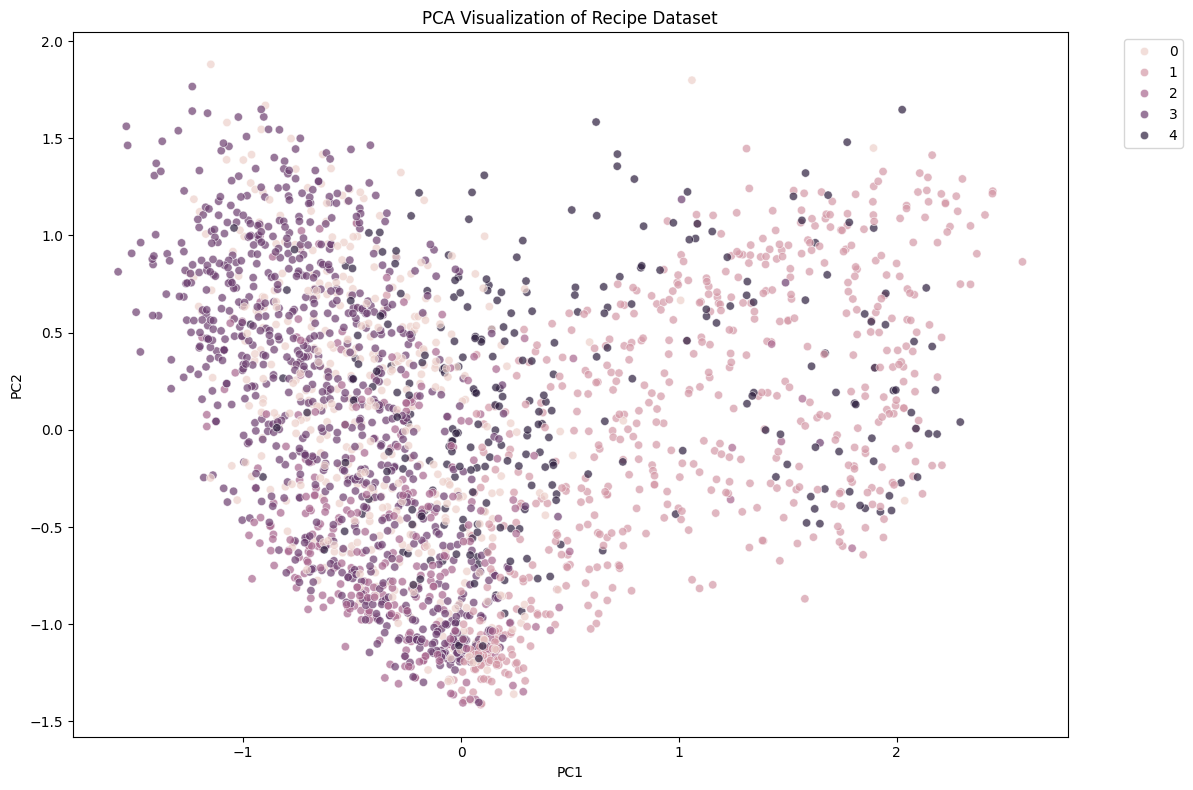

Explained variance ratio: [0.09424724 0.06844925]
Total explained variance: 0.1627


In [51]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cuisine': y_encoded
})

# Plot the first two principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cuisine', data=pca_df, alpha=0.7)
plt.title('PCA Visualization of Recipe Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

#### Step 14: Ensemble Visualization

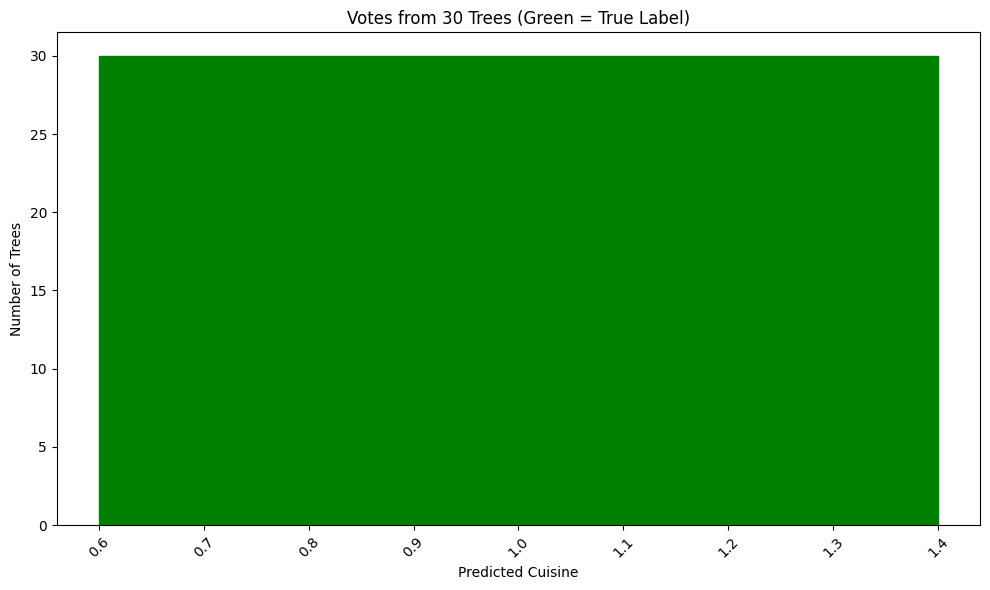

Votes distribution: {1.0: 30}


In [52]:
# Function to visualize how trees vote
def plot_tree_decisions(forest, X_sample, true_label, n_trees=10):
    """
    Visualize how different trees in the forest vote for a sample
    """
    plt.figure(figsize=(10, 6))
    
    # Get a sample
    sample = X_sample.values.reshape(1, -1)
    
    # Track votes
    votes = {}
    
    # Check predictions from first n trees
    for i in range(min(n_trees, len(forest.estimators_))):
        tree = forest.estimators_[i]
        prediction = tree.predict(sample)[0]
        cuisine = [prediction][0]
        
        if cuisine not in votes:
            votes[cuisine] = 0
        votes[cuisine] += 1
    
    # Sort votes
    sorted_votes = sorted(votes.items(), key=lambda x: x[1], reverse=True)
    cuisines = [x[0] for x in sorted_votes]
    vote_counts = [x[1] for x in sorted_votes]
    
    # Plot
    bars = plt.bar(cuisines, vote_counts)
    
    # Highlight the true label
    true_cuisine = [true_label][0]
    for i, cuisine in enumerate(cuisines):
        if cuisine == true_cuisine:
            bars[i].set_color('green')
    
    plt.title(f'Votes from {n_trees} Trees (Green = True Label)')
    plt.ylabel('Number of Trees')
    plt.xlabel('Predicted Cuisine')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return votes

# Take a sample from the test set
sample_idx = 5  # Adjust as needed
sample = X_test.iloc[sample_idx]
true_label = y_test[sample_idx]

# Visualize tree decisions for this sample
votes = plot_tree_decisions(rf_optimized, sample, true_label, n_trees=30)
print("Votes distribution:", votes)

In [54]:
# Evaluate with stratified k-fold to handle imbalanced classes
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_stratified = cross_val_score(
    rf_optimized, X, y_encoded, cv=skf, scoring='accuracy'
)

print("Stratified cross-validation scores:", cv_scores_stratified)
print(f"Mean stratified CV accuracy: {cv_scores_stratified.mean():.4f}")

# Demonstrate API usage for model deployment
print("\nExample API code for model deployment:")
print("""
from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# Load the model and encoder
model = joblib.load('cuisine_random_forest_model.pkl')
encoder = joblib.load('cuisine_label_encoder.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from request
    data = request.json
    
    # Convert to DataFrame
    df = pd.DataFrame([data])
    
    # Ensure all required columns exist
    # ... (code to handle missing columns) ...
    
    # Make prediction
    prediction_idx = model.predict(df)[0]
    prediction = encoder.inverse_transform([prediction_idx])[0]
    
    # Get confidence
    probs = model.predict_proba(df)[0]
    confidence = probs[prediction_idx]
    
    # Return prediction
    return jsonify({
        'cuisine': prediction,
        'confidence': float(confidence)
    })

if __name__ == '__main__':
    app.run(debug=True)
""")

Stratified cross-validation scores: [0.81020408 0.83265306 0.81632653 0.78323108 0.79754601]
Mean stratified CV accuracy: 0.8080

Example API code for model deployment:

from flask import Flask, request, jsonify
import pandas as pd
import joblib

app = Flask(__name__)

# Load the model and encoder
model = joblib.load('cuisine_random_forest_model.pkl')
encoder = joblib.load('cuisine_label_encoder.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from request
    data = request.json

    # Convert to DataFrame
    df = pd.DataFrame([data])

    # Ensure all required columns exist
    # ... (code to handle missing columns) ...

    # Make prediction
    prediction_idx = model.predict(df)[0]
    prediction = encoder.inverse_transform([prediction_idx])[0]

    # Get confidence
    probs = model.predict_proba(df)[0]
    confidence = probs[prediction_idx]

    # Return prediction
    return jsonify({
        'cuisine': prediction,
        'confidence': float(confid

## XGBoost

In [55]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from xgboost import plot_importance, plot_tree
import shap
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Data preparation

In [56]:
selected_df = df[df["cuisine"].isin(["korean", "japanese", "chinese", "thai", "indian"])]
# Extract features (X) and target (y)
X = selected_df.iloc[:, 1:]  # All ingredient columns
y = selected_df.iloc[:, 0]   # Cuisine column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1958, 383)
Testing set shape: (490, 383)


#### Initial model

Accuracy: 0.7938775510204081

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65        88
           1       0.90      0.94      0.92       120
           2       0.70      0.62      0.66        64
           3       0.81      0.85      0.83       160
           4       0.77      0.76      0.77        58

    accuracy                           0.79       490
   macro avg       0.77      0.76      0.77       490
weighted avg       0.79      0.79      0.79       490



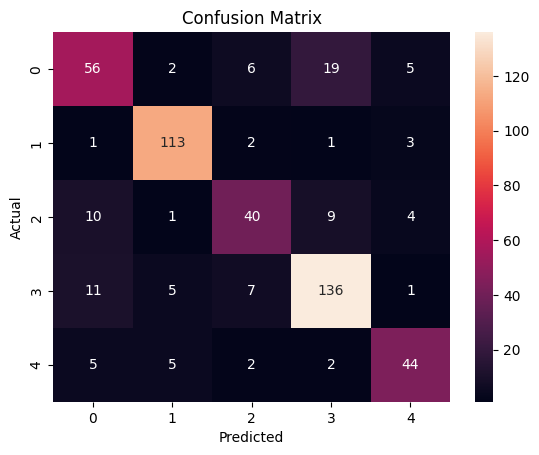

In [57]:
xgb_model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=xgb_model.classes_)
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Feature importance

<Figure size 1200x600 with 0 Axes>

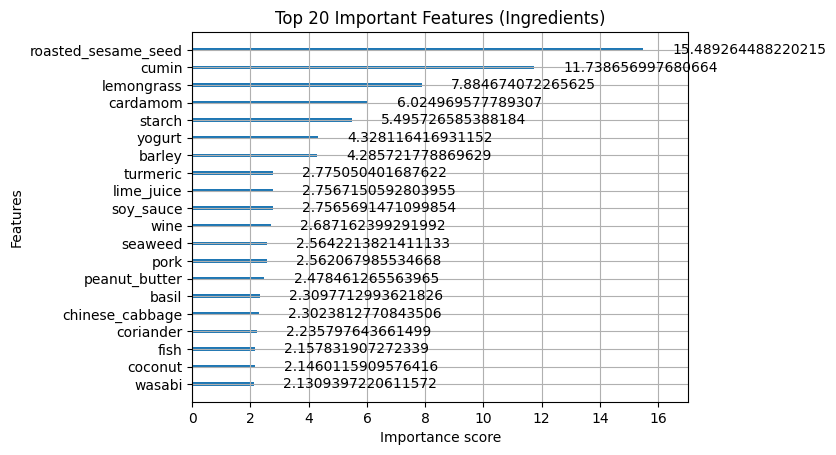

In [58]:
plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Important Features (Ingredients)")
plt.show()

#### Hyperparameter Tuning with GridSearchCV

In [59]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_search = GridSearchCV(
    XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42
    ),
    param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Use best model
xgb_best = grid_search.best_estimator_


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Accuracy: 0.8094973020540718


#### Confidence Analysis

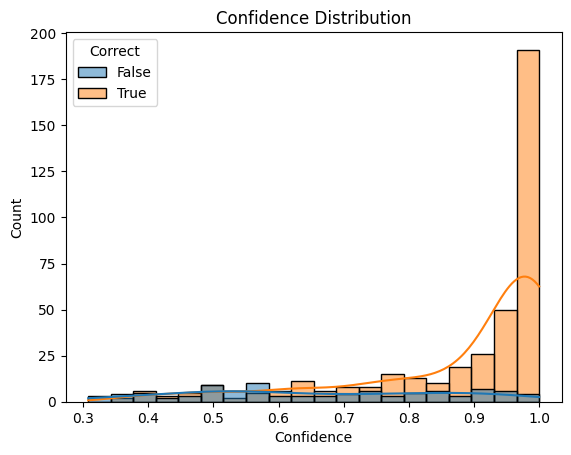

Average Confidence (Correct): 0.8830128
Average Confidence (Incorrect): 0.66173464


In [60]:
y_probs = xgb_best.predict_proba(X_test)
max_probs = np.max(y_probs, axis=1)

confidence_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': xgb_best.predict(X_test),
    'Confidence': max_probs
})
confidence_df['Correct'] = confidence_df['Actual'] == confidence_df['Predicted']

sns.histplot(data=confidence_df, x='Confidence', hue='Correct', bins=20, kde=True)
plt.title("Confidence Distribution")
plt.show()

print("Average Confidence (Correct):", confidence_df[confidence_df['Correct']]['Confidence'].mean())
print("Average Confidence (Incorrect):", confidence_df[~confidence_df['Correct']]['Confidence'].mean())


In [61]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(selected_df['cuisine'])

# Store the mapping for later reference
cuisine_mapping = {i: cuisine for i, cuisine in enumerate(label_encoder.classes_)}

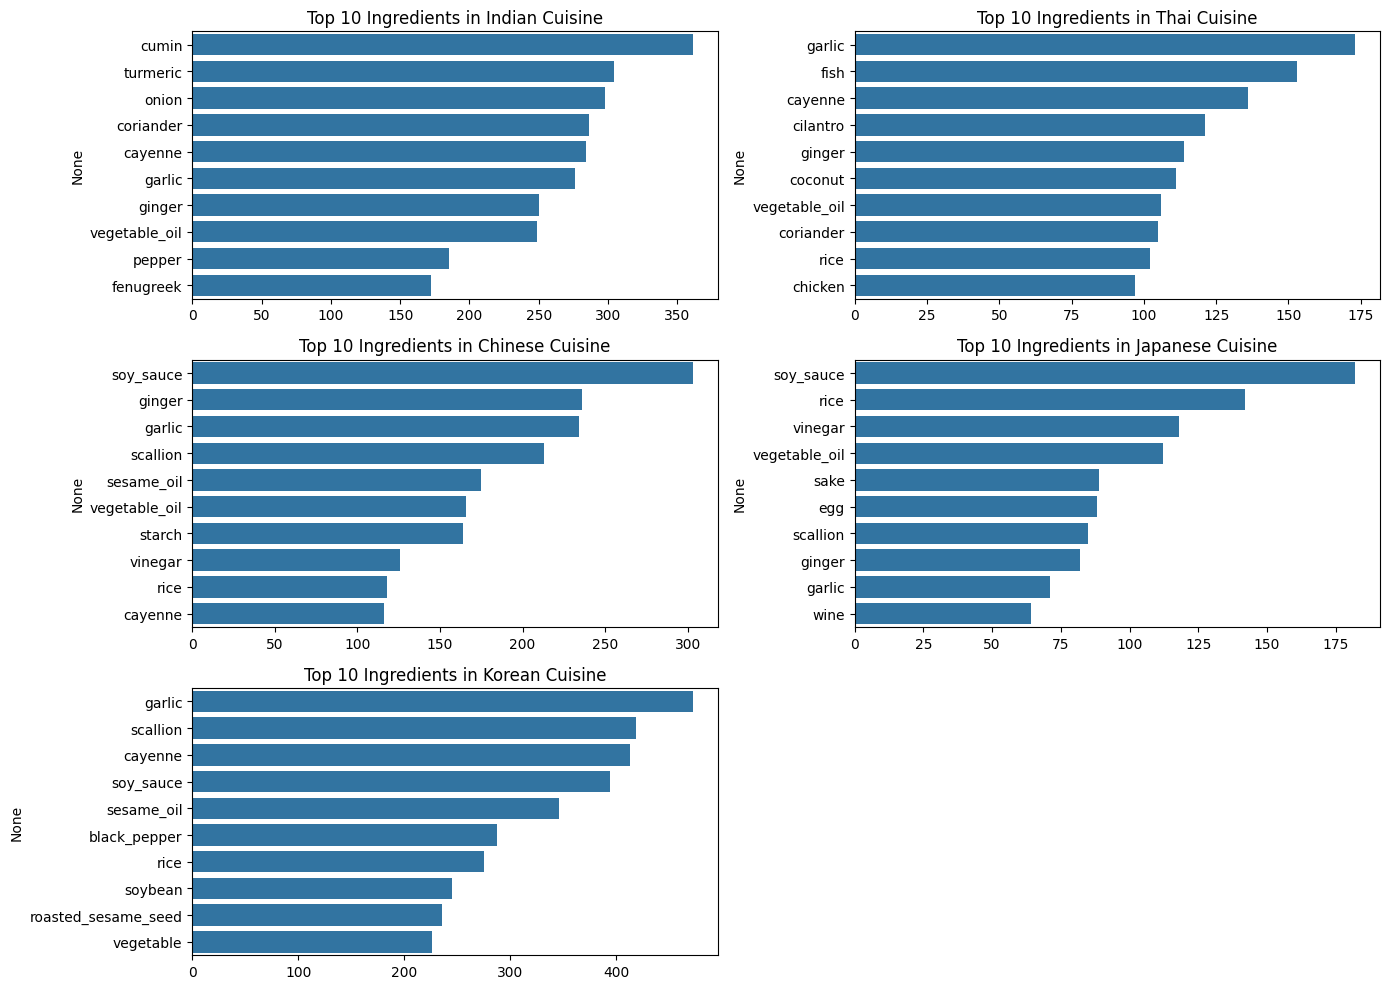

Class distribution:
chinese (chinese): 442 (18.06%)
indian (indian): 598 (24.43%)
japanese (japanese): 320 (13.07%)
korean (korean): 799 (32.64%)
thai (thai): 289 (11.81%)


In [62]:
# Let's analyze which ingredients are most common in each cuisine
cuisines = selected_df['cuisine'].unique()

plt.figure(figsize=(14, 10))
for i, cuisine in enumerate(cuisines):
    plt.subplot(3, 2, i+1)
    
    # Get subset for this cuisine
    cuisine_df = selected_df[selected_df['cuisine'] == cuisine]
    
    # Sum up the columns to get ingredient counts
    ingredient_counts = cuisine_df.drop('cuisine', axis=1).sum().sort_values(ascending=False)
    
    # Get top 10 ingredients
    top_ingredients = ingredient_counts.head(10)
    
    # Create bar plot
    sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
    plt.title(f'Top 10 Ingredients in {cuisine.capitalize()} Cuisine')
    plt.tight_layout()

plt.show()

# Let's also check for class imbalance
print("Class distribution:")
for cuisine, code in cuisine_mapping.items():
    count = (y == cuisine).sum()
    print(f"{code} ({cuisine_mapping[cuisine]}): {count} ({count/len(y)*100:.2f}%)")

Accuracy: 0.7857142857142857

Classification Report:
              precision    recall  f1-score   support

     chinese       0.69      0.62      0.65        88
      indian       0.90      0.97      0.93       120
    japanese       0.69      0.55      0.61        64
      korean       0.78      0.87      0.82       160
        thai       0.78      0.69      0.73        58

    accuracy                           0.79       490
   macro avg       0.77      0.74      0.75       490
weighted avg       0.78      0.79      0.78       490



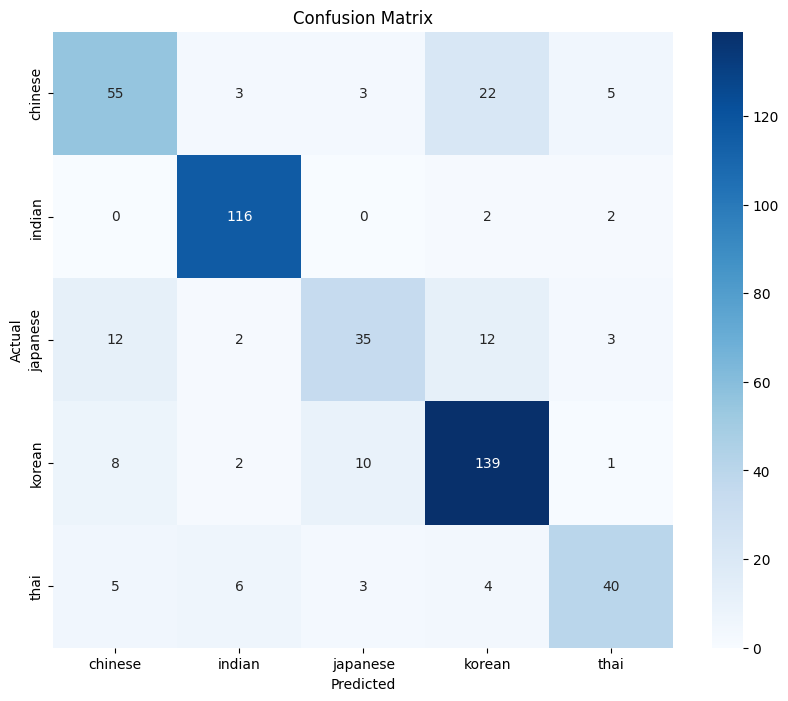

In [63]:
# Define a simple XGBoost model
xgb_model = XGBClassifier(
    objective='multi:softprob',  # For multi-class classification
    num_class=len(cuisines),     # Number of cuisine classes
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[cuisine_mapping[i] for i in range(len(cuisines))]))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[cuisine_mapping[i] for i in range(len(cuisines))],
            yticklabels=[cuisine_mapping[i] for i in range(len(cuisines))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1200x800 with 0 Axes>

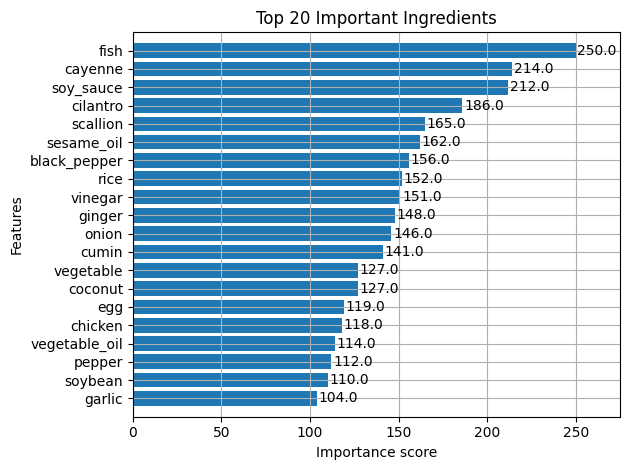

NameError: name 'feature_names' is not defined

<Figure size 1200x800 with 0 Axes>

In [64]:
# Plot feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, max_num_features=20, height=0.8)
plt.title('Top 20 Important Ingredients')
plt.tight_layout()
plt.show()

# More detailed feature importance with SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test.values, feature_names=feature_names, plot_size=(12, 8))
plt.title('SHAP Value Summary')
plt.tight_layout()
plt.show()

# For each class
for i, cuisine in enumerate(cuisines):
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values[i], X_test.values, feature_names=feature_names, plot_type='bar', plot_size=(12, 8))
    plt.title(f'SHAP Values - {cuisine.capitalize()} Cuisine')
    plt.tight_layout()
    plt.show()

In [ ]:
# Set up cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")
print(f"Standard deviation: {cv_scores.std():.4f}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best score: 0.8105190140205502
Tuned model accuracy: 0.7979591836734694

Tuned model classification report:
              precision    recall  f1-score   support

     chinese       0.65      0.67      0.66        88
      indian       0.91      0.97      0.94       120
    japanese       0.72      0.59      0.65        64
      korean       0.82      0.85      0.83       160
        thai       0.79      0.72      0.76        58

    accuracy                           0.80       490
   macro avg       0.78      0.76      0.77       490
weighted avg       0.80      0.80      0.80       490



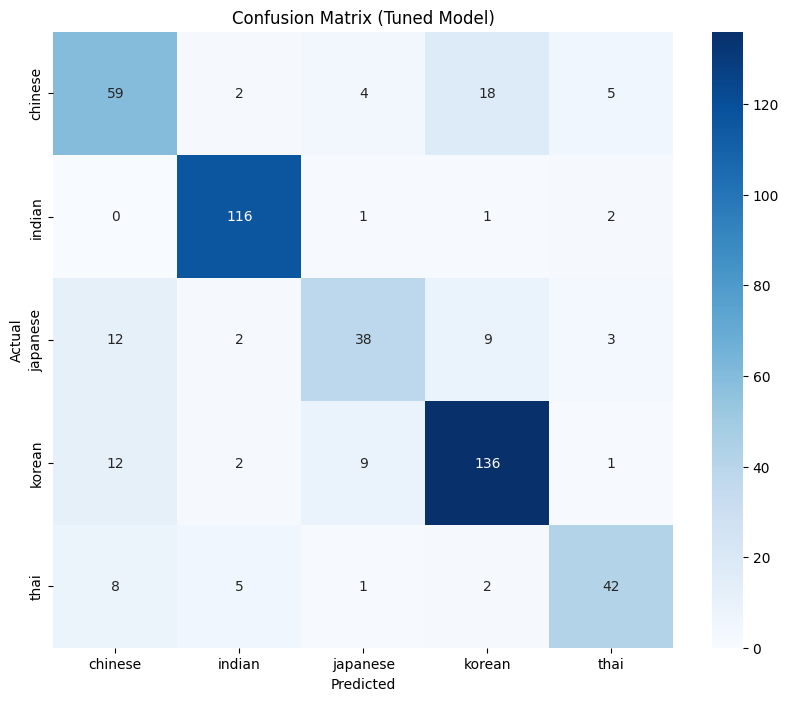

In [65]:
# Define parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=XGBClassifier(objective='multi:softprob', num_class=len(cuisines), random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # Reduced for computational efficiency
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best parameters
best_xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=len(cuisines),
    random_state=42,
    **grid_search.best_params_
)

best_xgb_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = best_xgb_model.predict(X_test)
print("Tuned model accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned model classification report:")
print(classification_report(y_test, y_pred_best, target_names=[cuisine_mapping[i] for i in range(len(cuisines))]))

# Confusion Matrix for tuned model
plt.figure(figsize=(10, 8))
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[cuisine_mapping[i] for i in range(len(cuisines))],
            yticklabels=[cuisine_mapping[i] for i in range(len(cuisines))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned Model)')
plt.show()

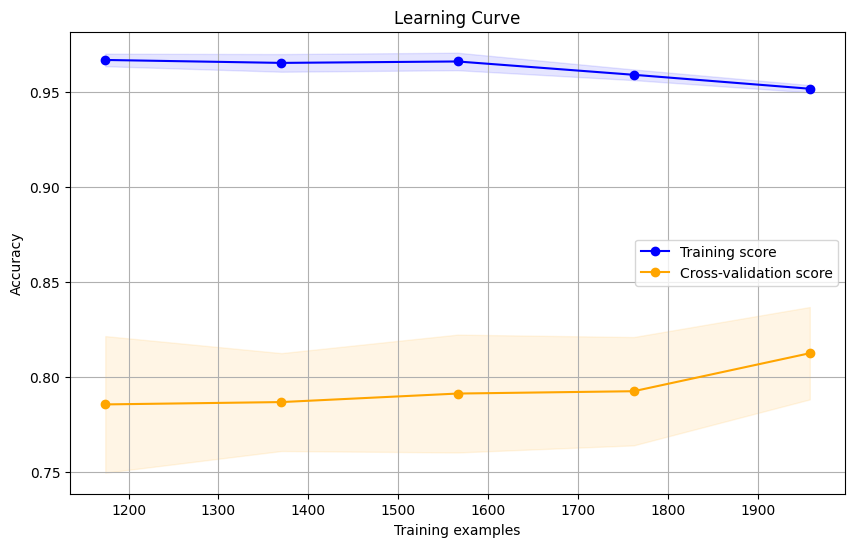

In [66]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    best_xgb_model, X, y, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, 
    scoring='accuracy'
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.grid()
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [67]:
# Save the model
model_filename = 'cuisine_classifier_xgboost.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_xgb_model, file)

# Save the label encoder
encoder_filename = 'cuisine_label_encoder.pkl'
with open(encoder_filename, 'wb') as file:
    pickle.dump(label_encoder, file)

print(f"Model saved to {model_filename}")
print(f"Label encoder saved to {encoder_filename}")

# Create a function to load the model and make predictions
def load_model_and_predict(input_data, model_path, encoder_path):
    # Load the model and label encoder
    with open(model_path, 'rb') as file:
        model = pickle.load(file)
    
    with open(encoder_path, 'rb') as file:
        le = pickle.load(file)
    
    # Make prediction
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)
    
    # Convert prediction to cuisine name
    predicted_cuisine = le.inverse_transform(prediction)
    
    return predicted_cuisine, prediction_proba

# Example usage
print("\nExample of model deployment usage:")
print("To predict cuisine for new data:")
print("predicted_cuisine, probabilities = load_model_and_predict(new_data, 'cuisine_classifier_xgboost.pkl', 'cuisine_label_encoder.pkl')")

Model saved to cuisine_classifier_xgboost.pkl
Label encoder saved to cuisine_label_encoder.pkl

Example of model deployment usage:
To predict cuisine for new data:
predicted_cuisine, probabilities = load_model_and_predict(new_data, 'cuisine_classifier_xgboost.pkl', 'cuisine_label_encoder.pkl')
